# **Working with CNN**

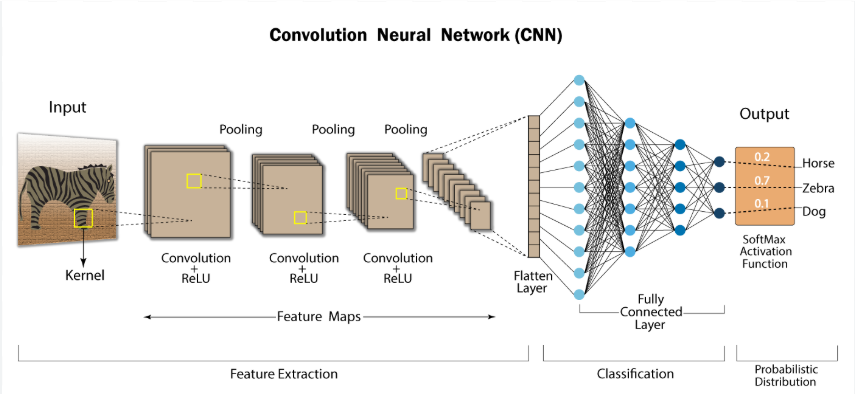

* Work with Black & White Images
* Work with colored Images

## **Work with Black & White Images**

**Fashion Mnist Data**

In [1]:
# importing libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import keras
from keras import layers

In [2]:
# loading the data

fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# observing the data shapes

print(f"X_train shape: {x_train.shape}")
print(f"X_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {y_test.shape}")

X_train shape: (60000, 28, 28)
X_test shape: (10000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000,)


In [4]:
# data types

x_train.dtype, y_train.dtype

(dtype('uint8'), dtype('uint8'))

In [5]:
tags = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]

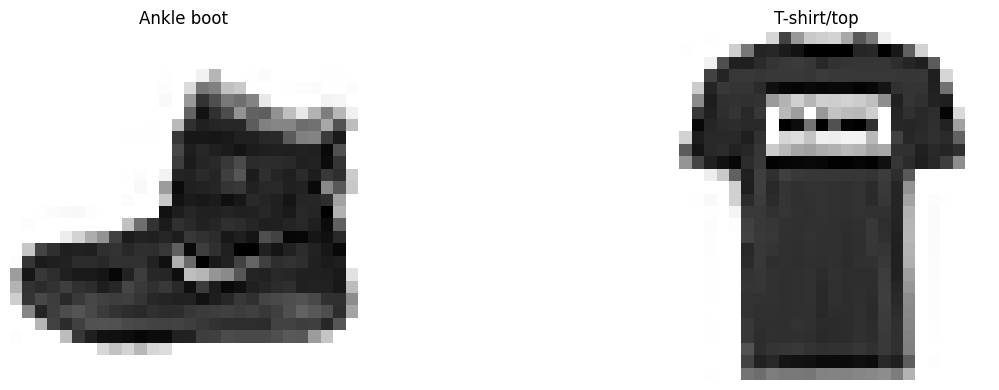

In [6]:
# viewing the data
plt.figure(figsize=(15, 4))

for i in range(2):
  ax = plt.subplot(1, 2, i+1)
  plt.imshow(x_train[i], cmap = 'binary')
  plt.axis('off')
  plt.title(tags[y_train[i]])

plt.tight_layout()
plt.show()

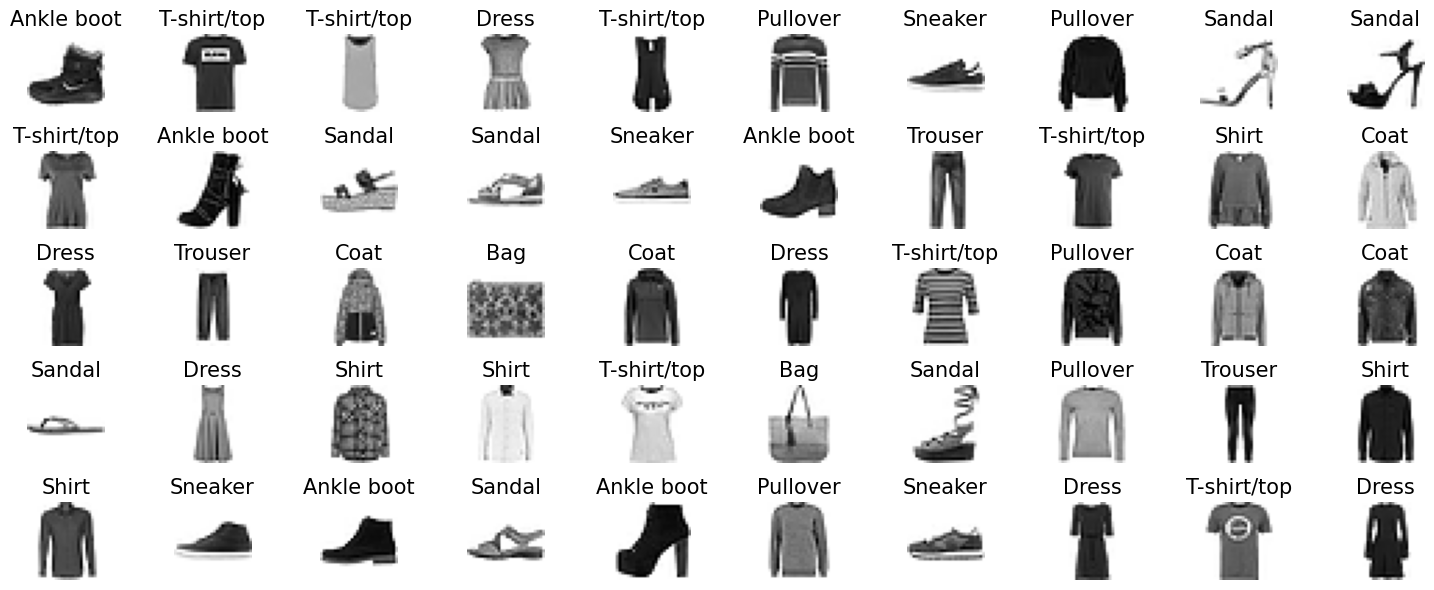

In [7]:
plt.figure(figsize = (15, 6))

for i in range(50):
  ax = plt.subplot(5, 10, i+1)
  plt.imshow(x_train[i], cmap = 'binary')
  plt.axis('off')
  plt.title(tags[y_train[i]], fontsize=15)

plt.tight_layout()
plt.show()

In [8]:
# changing the shape of data to be compatable to cnn model

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [9]:
print(f"X_train shape: {x_train.shape}")
print(f"X_test shape: {x_test.shape}")

X_train shape: (60000, 28, 28, 1)
X_test shape: (10000, 28, 28, 1)


In [10]:
# creating a validation data

x_valid, x_trian_scaled = x_train[:4000]/255, x_train[4000:]/255
y_valid, y_train = y_train[:4000], y_train[4000:]

In [11]:
x_test_scaled = x_test/255
x_train = x_train[4000:]

In [12]:
print(f"X_train shape: {x_train.shape}")
print(f"X_test shape: {x_test.shape}")
print(f"X_valiation shape: {x_valid.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"y_validation shape: {y_valid.shape}")

X_train shape: (56000, 28, 28, 1)
X_test shape: (10000, 28, 28, 1)
X_valiation shape: (4000, 28, 28, 1)
y_train shape: (56000,)
y_test shape: (10000,)
y_validation shape: (4000,)


**Creating a CNN model**

In [13]:
classifier = keras.Sequential([
    keras.Input(shape=(28, 28, 1)),
    layers.Conv2D(32, (3, 3), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPool2D(pool_size=(2, 2)),
    layers.Conv2D(64, (3, 3), padding='same'),
    layers.BatchNormalization(),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPool2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax')
])

classifier.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=[keras.metrics.SparseCategoricalAccuracy(name='accuracy')]
)

classifier.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 425,450 (1.62 MB)

 Trainable params: 425,130 (1.62 MB)

 Non-trainable params: 320 (1.25 KB)

In [14]:
# model training

history = classifier.fit(
    x_trian_scaled, y_train,
    validation_data=(x_valid, y_valid),
    epochs = 10
)

Epoch 1/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.7983 - loss: 0.5660 - val_accuracy: 0.8602 - val_loss: 0.3789
Epoch 2/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.8996 - loss: 0.2773 - val_accuracy: 0.8980 - val_loss: 0.2977
Epoch 3/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9144 - loss: 0.2299 - val_accuracy: 0.9095 - val_loss: 0.2450
Epoch 4/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9239 - loss: 0.2046 - val_accuracy: 0.9143 - val_loss: 0.2362
Epoch 5/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9364 - loss: 0.1708 - val_accuracy: 0.9215 - val_loss: 0.2165
Epoch 6/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9444 - loss: 0.1490 - val_accuracy: 0.9125 - val_loss: 0.2507
Epoch 7/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9500 - loss: 0.1316 - val_accuracy: 0.9130 - val_loss: 0.2539
Epoch 8/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9556 - loss: 0.

We can observe that,

* The model is less complex
* Also for initial 10 epochs only we achieved a train accuracy of arount 97%
* When we compare with the before Ann working and can observe the exceptional performance on the CNN model

In [15]:
# score checking


test_loss, test_acc = classifier.evaluate(x_test_scaled, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

Test Loss: 0.2652
Test Accuracy: 0.9178


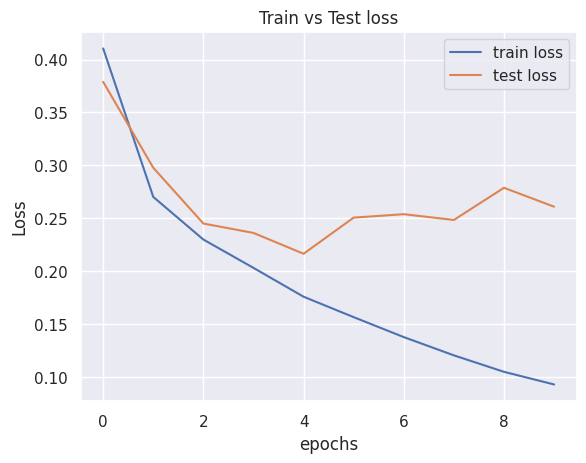

In [16]:
# loss graphs

sns.set_theme(style='darkgrid')
plt.plot(history.history['loss'], label = 'train loss')
plt.plot(history.history['val_loss'], label = 'test loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.title("Train vs Test loss")
plt.legend()
plt.show()

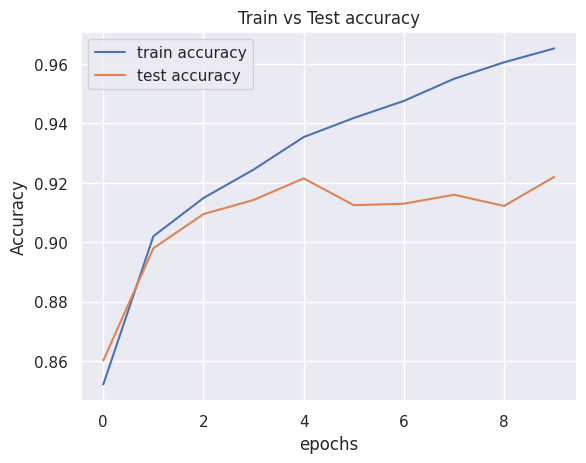

In [17]:
# Accuracy graphs

sns.set_theme(style='darkgrid')
plt.plot(history.history['accuracy'], label = 'train accuracy')
plt.plot(history.history['val_accuracy'], label = 'test accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.title("Train vs Test accuracy")
plt.legend()
plt.show()

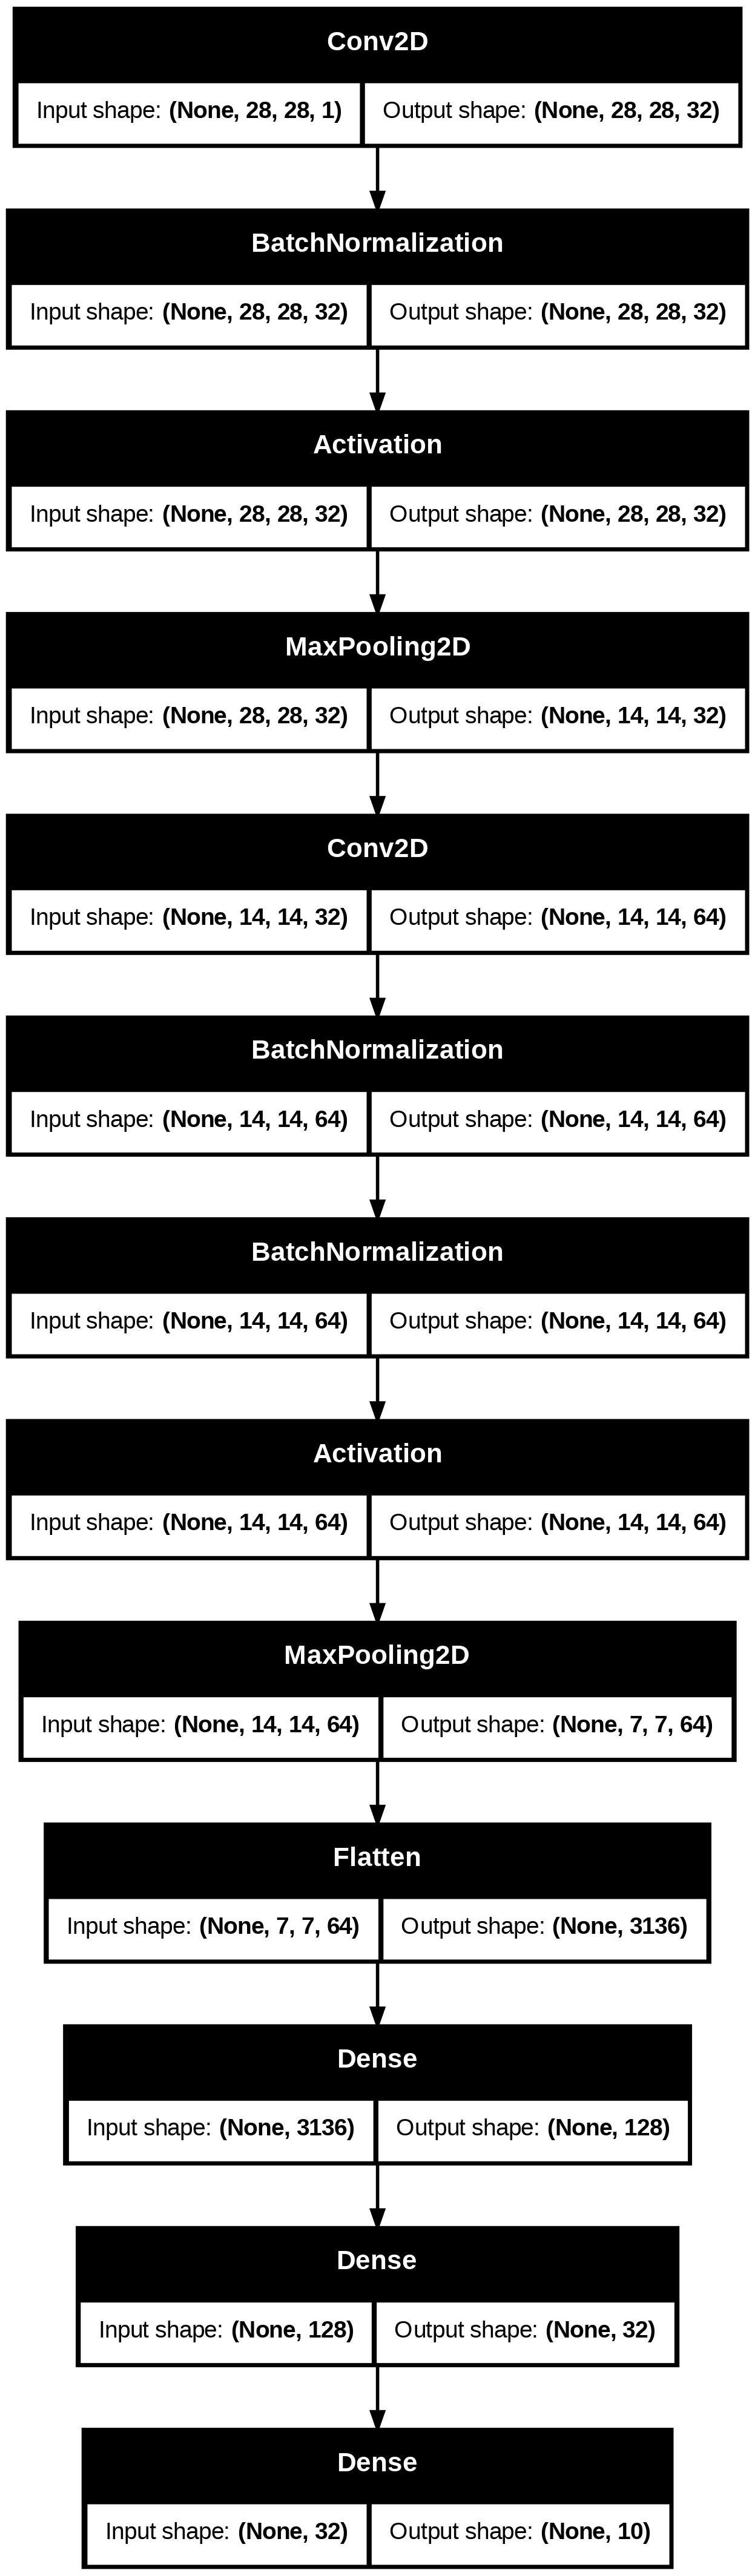

In [18]:
# model plotting

from tensorflow.keras.utils import plot_model
plot_model(classifier, show_shapes = True)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


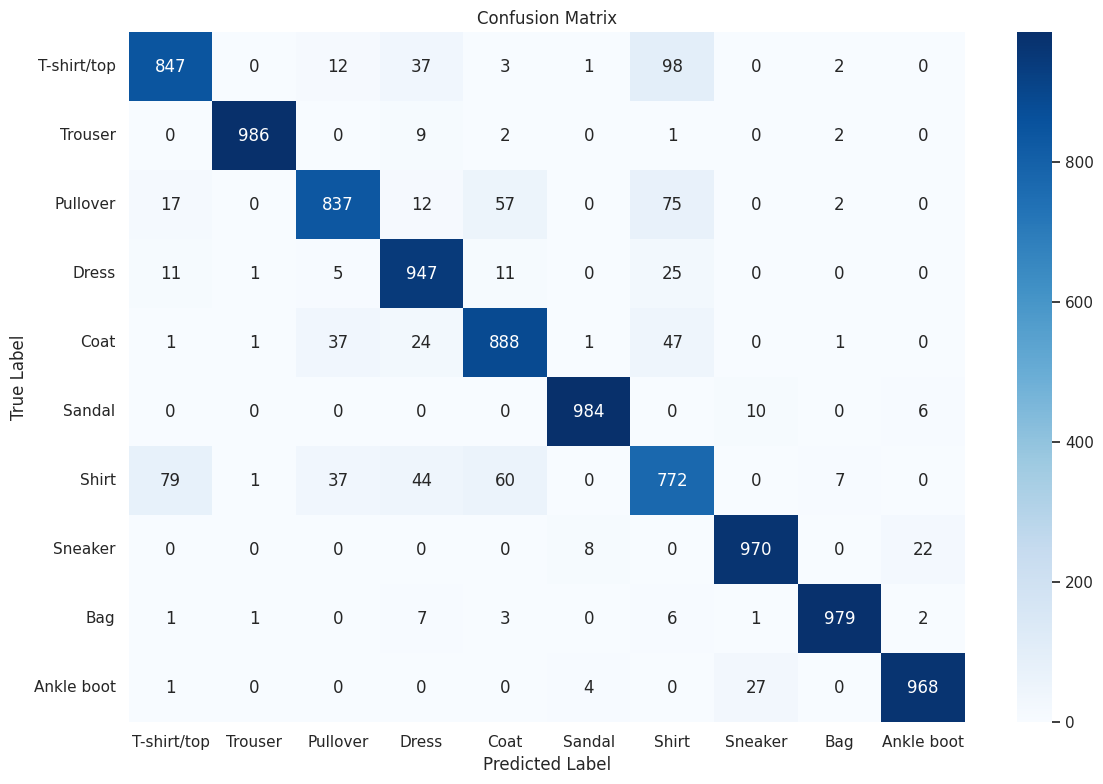

In [19]:
# confution matrix

from sklearn.metrics import confusion_matrix

probs = classifier.predict(x_test_scaled)
y_pred = np.argmax(probs, axis = 1)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=tags,
            yticklabels=tags
            )
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

We can observe,

* For 10 epochs only and less complexity in the model
* The Errors in predictions were decreased alot


## **Work with Colored Images**

**CIFar Data**

In [1]:
# importing necessary libraries

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import keras
from keras import layers

This is a dataset of 50,000 32x32 color training images and 10,000 test
images, labeled over 10 categories. See more info at the
[CIFAR homepage](https://www.cs.toronto.edu/~kriz/cifar.html).

The classes are:

| Label | Description |
|:-----:|-------------|
|   0   | airplane    |
|   1   | automobile  |
|   2   | bird        |
|   3   | cat         |
|   4   | deer        |
|   5   | dog         |
|   6   | frog        |
|   7   | horse       |
|   8   | ship        |
|   9   | truck       |

Returns:
    Tuple of NumPy arrays: `(x_train, y_train), (x_test, y_test)`.

**`x_train`**: `uint8` NumPy array of grayscale image data with shapes
  `(50000, 32, 32, 3)`, containing the training data. Pixel values range
  from 0 to 255.

**`y_train`**: `uint8` NumPy array of labels (integers in range 0-9)
  with shape `(50000, 1)` for the training data.

**`x_test`**: `uint8` NumPy array of grayscale image data with shapes
  `(10000, 32, 32, 3)`, containing the test data. Pixel values range
  from 0 to 255.

**`y_test`**: `uint8` NumPy array of labels (integers in range 0-9)
  with shape `(10000, 1)` for the test data.

In [2]:
# loading the data

cifar_data = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar_data.load_data()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 15s 0us/step


In [3]:
tags = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck"
]

In [4]:
y_train = y_train.ravel()
y_test = y_test.ravel()

In [5]:
# observing the data shapes

print(f"X_train shape: {x_train.shape}")
print(f"X_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {y_test.shape}")


X_train shape: (50000, 32, 32, 3)
X_test shape: (10000, 32, 32, 3)
y_train shape: (50000,)
X_test shape: (10000,)


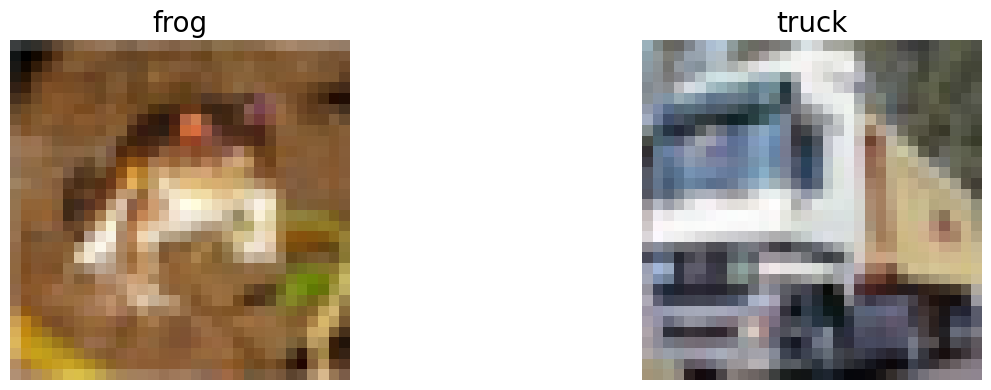

In [6]:
# viewing the data

plt.figure(figsize=(15, 4))

for i in range(2):
  ax = plt.subplot(1, 2, i+1)
  plt.imshow(x_train[i])
  plt.axis('off')
  plt.title(tags[y_train[i]], fontsize=20)

plt.tight_layout()
plt.show()

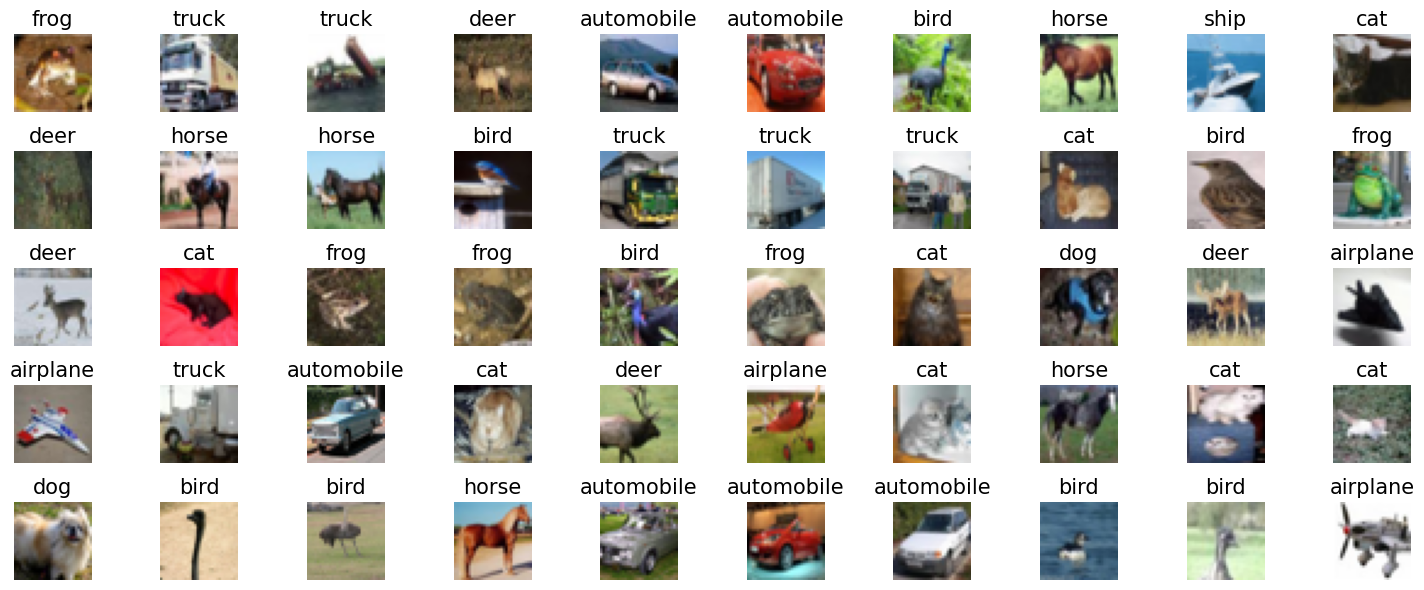

In [7]:
plt.figure(figsize = (15, 6))

for i in range(50):
  ax = plt.subplot(5, 10, i+1)
  plt.imshow(x_train[i])
  plt.axis('off')
  plt.title(tags[y_train[i]], fontsize=15)

plt.tight_layout()
plt.show()

In [8]:
# scaling the data and creating a validation data

x_valid, x_train_scaled = x_train[:4000]/255, x_train[4000:]/255
y_valid, y_train = y_train[:4000], y_train[4000:]


In [9]:
x_train = x_train[4000:]

x_test_scaled = x_test/255


In [14]:
# model defining

model = keras.Sequential([
    keras.Input(shape=(32, 32, 3)),
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.Dropout(0.2),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.Dropout(0.25),
    layers.MaxPool2D(pool_size=(2, 2)),
    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.Dropout(0.25),
    layers.MaxPool2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=[keras.metrics.SparseCategoricalAccuracy(name='accuracy')]
)
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,207,754 (8.42 MB)

 Trainable params: 2,207,754 (8.42 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# model training

history = model.fit(
    x_train_scaled, y_train,
    validation_data=(x_valid, y_valid),
    epochs = 20
)

Epoch 1/20
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.3360 - loss: 1.7914 - val_accuracy: 0.5900 - val_loss: 1.1779
Epoch 2/20
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.5964 - loss: 1.1242 - val_accuracy: 0.6467 - val_loss: 1.0330
Epoch 3/20
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6726 - loss: 0.9307 - val_accuracy: 0.7020 - val_loss: 0.9054
Epoch 4/20
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7119 - loss: 0.8231 - val_accuracy: 0.7147 - val_loss: 0.8468
Epoch 5/20
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7363 - loss: 0.7449 - val_accuracy: 0.7278 - val_loss: 0.8020
Epoch 6/20
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7574 - loss: 0.6777 - val_accuracy: 0.7300 - val_loss: 0.7900
Epoch 7/20
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7798 - loss: 0.6314 - val_accuracy: 0.7435 - val_loss: 0.7397
Epoch 8/20
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7907 - loss: 0.589

In [16]:
# evaluation on test data

test_loss, test_acc = model.evaluate(x_test_scaled, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

Test Loss: 0.7629
Test Accuracy: 0.7499


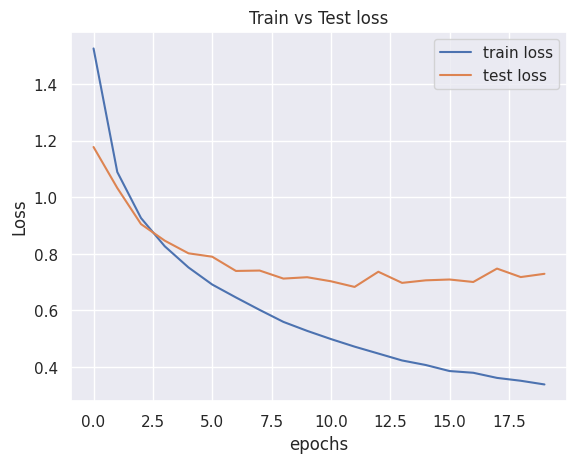

In [17]:
# loss graphs

sns.set_theme(style='darkgrid')
plt.plot(history.history['loss'], label = 'train loss')
plt.plot(history.history['val_loss'], label = 'test loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.title("Train vs Test loss")
plt.legend()
plt.show()

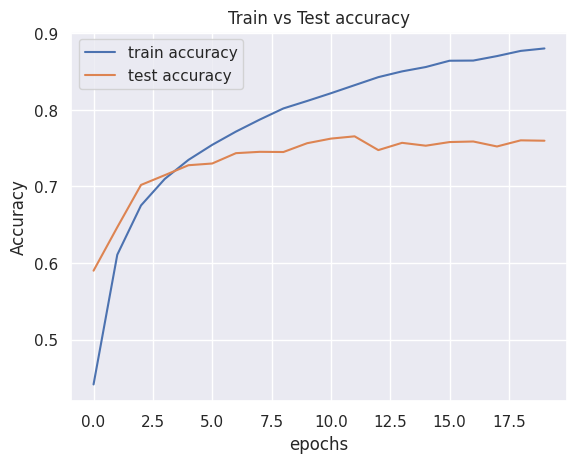

In [18]:
# Accuracy graphs

sns.set_theme(style='darkgrid')
plt.plot(history.history['accuracy'], label = 'train accuracy')
plt.plot(history.history['val_accuracy'], label = 'test accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.title("Train vs Test accuracy")
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


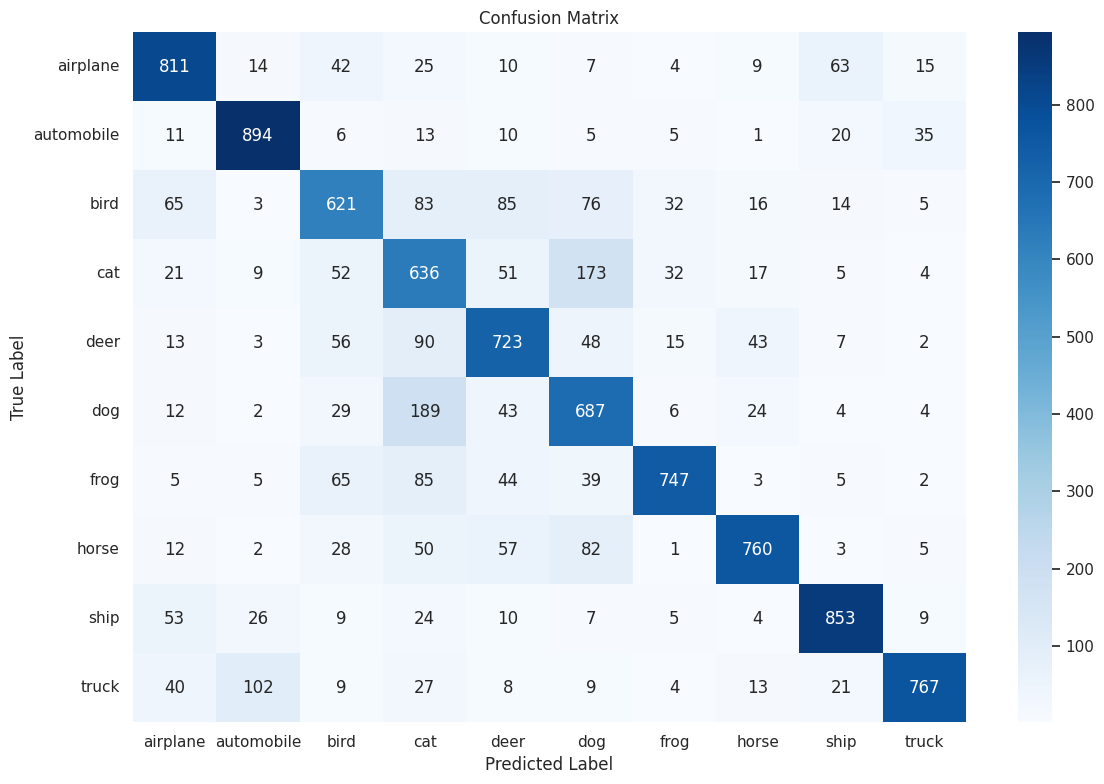

In [19]:
# confution matrix

from sklearn.metrics import confusion_matrix

probs = model.predict(x_test_scaled)
y_pred = np.argmax(probs, axis = 1)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=tags,
            yticklabels=tags
            )
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

To reduce the errors
* we need to improve the complexity of the model and the number of training epochs.
* There is another efficient method **"pretrained model usage"**